In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# ========== 1. IMPORT DATA ==========
# Make sure Data.xlsx is in the same directory or provide the full path
df = pd.read_excel('Data.xlsx')

# Preview the data (optional)
print("Dataframe head:\n", df.head())

# ========== 2. DISTRIBUTION ANALYSIS ==========

# List of friend answer columns (i.e., correctness indicators)
friend_cols = ['AnswerD', 'AnswerN', 'AnswerC', 'AnswerG',
               'AnswerE', 'AnswerO', 'AnswerM', 'AnswerV', 'AnswerEg','AnswerMrt','AnswerOz','AnswerP']

# (A) Distribution of correct answers by Nationality
nationality_dist = df.groupby('Nationality')[friend_cols].mean()
print("\nMean correctness by Nationality:\n", nationality_dist)

# (B) Distribution of correct answers by Sex
sex_dist = df.groupby('Sex')[friend_cols].mean()
print("\nMean correctness by Sex:\n", sex_dist)

# (C) Distribution by Nationality *and* Sex
nat_sex_dist = df.groupby(['Nationality', 'Sex'])[friend_cols].mean()
print("\nMean correctness by Nationality and Sex:\n", nat_sex_dist)

# Optionally visualize these distributions using bar plots or similar
# Example: mean correctness per friend by Sex
fig, ax = plt.subplots(figsize=(8, 5))
sex_dist.T.plot.bar(ax=ax)
ax.set_title('Mean Correctness by Sex (across all friends)')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# ========== 3. CORRELATION MATRIX OF FRIENDS’ ANSWERS ==========

# Compute correlation matrix among friends
corr_matrix = df[friend_cols].corr()

# To reorder so that the largest correlations appear in the top-left corner,
# we can use hierarchical clustering on the correlation matrix
distance = 1 - corr_matrix
# Perform hierarchical clustering
link = linkage(distance, method='ward')
# Get the order of the leaves
idx = leaves_list(link)
# Reindex the correlation matrix
reordered_corr = corr_matrix.iloc[idx, idx]

print("\nCorrelation matrix of friends’ answers (reordered):\n", reordered_corr)

# Visualize this reordered correlation matrix with a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(reordered_corr, 
            cmap='coolwarm',  # red for high corr, blue for low corr
            annot=True,       # show numerical correlation values
            vmin=-1, vmax=1,
            square=True,
            ax=ax)
ax.set_title('Correlation Matrix of Friends’ Answers (Reordered)')
plt.tight_layout()
plt.show()

# ========== 4. CORRELATIONS BY SUBGROUP (SEX, NATIONALITY) ==========

# Here we compute correlation matrices within each subgroup of Sex and Nationality.
# This can be quite a few subgroups if you have many categories of Nationality.

# Subgroup correlation by Sex
unique_sex = df['Sex'].unique()
sex_corr_dict = {}
for s in unique_sex:
    subset = df[df['Sex'] == s]
    # Compute correlation among friend_cols in this subset
    sex_corr = subset[friend_cols].corr()
    sex_corr_dict[s] = sex_corr
    print(f"\nCorrelation matrix for Sex = {s}:\n", sex_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(sex_corr, 
                cmap='coolwarm', 
                annot=True, 
                vmin=-1, vmax=1, 
                square=True, 
                ax=ax)
    ax.set_title(f'Correlation (Sex = {s})')
    plt.tight_layout()
    plt.show()

# Subgroup correlation by Nationality
unique_nationalities = df['Nationality'].unique()
nat_corr_dict = {}
for nat in unique_nationalities:
    subset = df[df['Nationality'] == nat]
    # Compute correlation among friend_cols in this subset
    nat_corr = subset[friend_cols].corr()
    nat_corr_dict[nat] = nat_corr
    print(f"\nCorrelation matrix for Nationality = {nat}:\n", nat_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(nat_corr, 
                cmap='coolwarm', 
                annot=True, 
                vmin=-1, vmax=1, 
                square=True, 
                ax=ax)
    ax.set_title(f'Correlation (Nationality = {nat})')
    plt.tight_layout()
    plt.show()

# ========== 5. ADDITIONAL IDEAS FOR ANALYSIS ==========

# - You could look at the distribution of AnswerSum by Nationality and Sex:
sum_dist = df.groupby(['Nationality','Sex'])['AnswerSum'].mean()
print("\nMean of AnswerSum by Nationality and Sex:\n", sum_dist)

# - You could check the correlation of each friend’s correctness with AnswerSum:
friend_sum_corr = df[friend_cols + ['AnswerSum']].corr()['AnswerSum'].drop('AnswerSum')
print("\nCorrelation of each friend’s correctness with AnswerSum:\n", friend_sum_corr)

# - You could also visually compare how often each friend was correct across all observations:
mean_correctness_per_friend = df[friend_cols].mean()
fig, ax = plt.subplots(figsize=(8, 5))
mean_correctness_per_friend.plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylim([0, 1])
ax.set_title('Overall Mean Correctness per Friend')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# =======================================================
# Feel free to modify or expand these plots for your needs.
# =======================================================

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

Dataframe head:
    #  Nationality  Sex  AnswerD  AnswerN  AnswerC  AnswerG  AnswerE  AnswerO  \
0  1            0    1        1        1        1        1        1        1   
1  2            0    0        0        1        0        0        0        1   
2  3            0    1        1        0        1        0        0        0   
3  4            0    1        0        1        0        0        0        0   
4  5            0    0        1        1        1        1        1        1   

   AnswerM  AnswerV  AnswerSum  
0        1        0          7  
1        0        0          2  
2        0        1          3  
3        1        0          2  
4        1        1          8  

Mean correctness by Nationality:
              AnswerD  AnswerN  AnswerC  AnswerG  AnswerE  AnswerO  AnswerM  \
Nationality                                                                  
0               0.72     0.70     0.58     0.68     0.64     0.76      0.7   
1               0.72     0.76     0

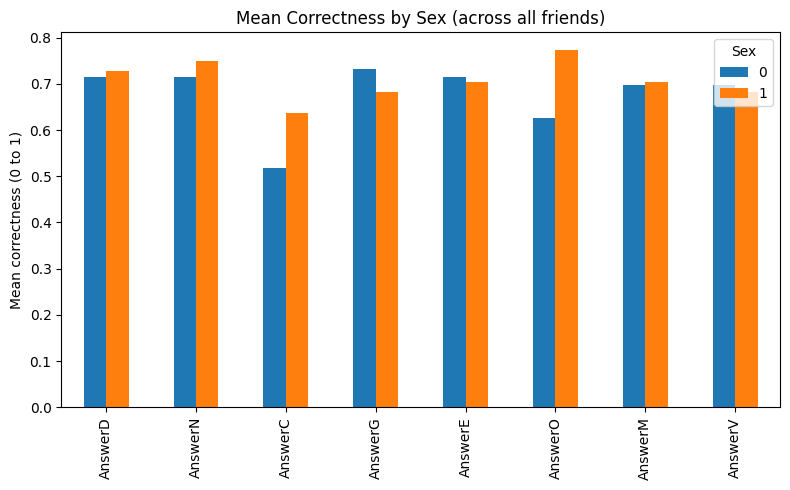

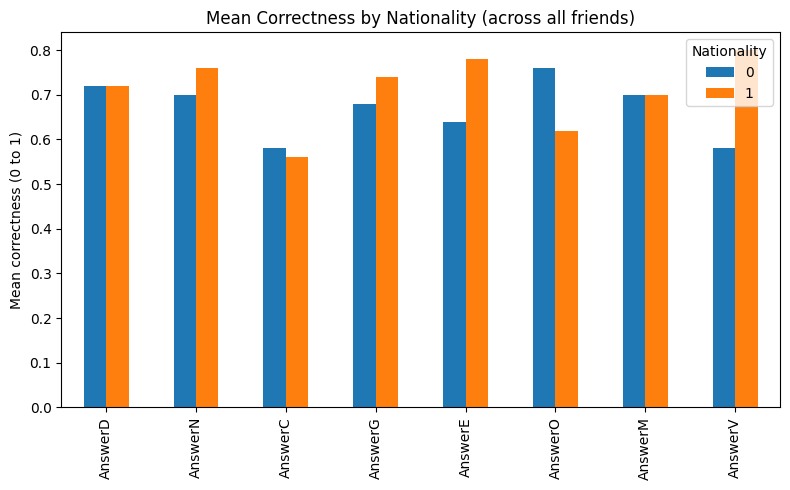


Correlation matrix of friends’ answers (reordered):
           AnswerD   AnswerE   AnswerC   AnswerV   AnswerG   AnswerN   AnswerO  \
AnswerD  1.000000  0.534017  0.448066  0.352501  0.288605  0.222738  0.208033   
AnswerE  0.534017  1.000000  0.379708  0.476980  0.222924  0.206997  0.238728   
AnswerC  0.448066  0.379708  1.000000  0.378654  0.246164  0.199733  0.160284   
AnswerV  0.352501  0.476980  0.378654  1.000000  0.334029  0.176790  0.158485   
AnswerG  0.288605  0.222924  0.246164  0.334029  1.000000  0.206997  0.238728   
AnswerN  0.222738  0.206997  0.199733  0.176790  0.206997  1.000000  0.274195   
AnswerO  0.208033  0.238728  0.160284  0.158485  0.238728  0.274195  1.000000   
AnswerM  0.223565  0.399154  0.224796  0.268943  0.254881  0.240848  0.316126   

          AnswerM  
AnswerD  0.223565  
AnswerE  0.399154  
AnswerC  0.224796  
AnswerV  0.268943  
AnswerG  0.254881  
AnswerN  0.240848  
AnswerO  0.316126  
AnswerM  1.000000  


/tmp/ipykernel_5799/647533338.py:57: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(distance, method='ward')


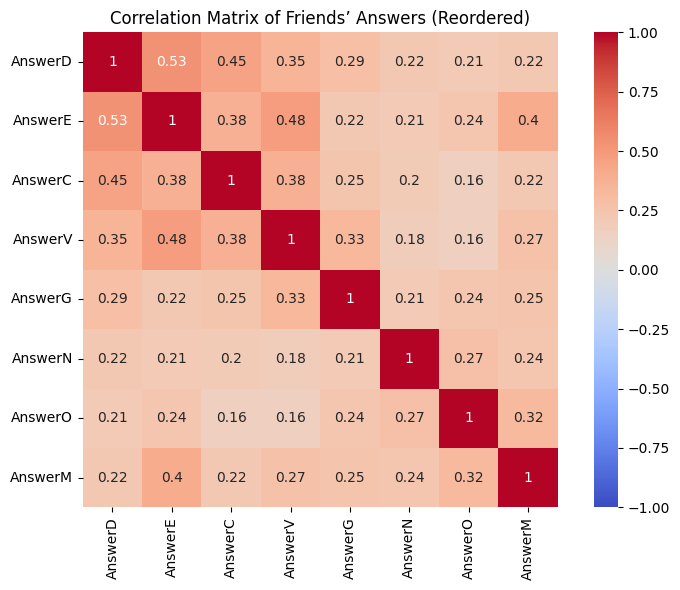


Correlation matrix for Sex = 1:
           AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO   AnswerM  \
AnswerD  1.000000  0.117851  0.385758  0.129483  0.833788  0.276755  0.274540   
AnswerN  0.117851  1.000000  0.109109  0.056344  0.201319  0.313112  0.431398   
AnswerC  0.385758  0.109109  1.000000  0.193649  0.442452  0.266474  0.131794   
AnswerG  0.129483  0.056344  0.193649  1.000000  0.199313  0.095266  0.092365   
AnswerE  0.833788  0.201319  0.442452  0.199313  1.000000  0.362004  0.344913   
AnswerO  0.276755  0.313112  0.266474  0.095266  0.362004  1.000000  0.480870   
AnswerM  0.274540  0.431398  0.131794  0.092365  0.344913  0.480870  1.000000   
AnswerV  0.567734  0.056344  0.497955  0.161905  0.627108  0.211702  0.092365   

          AnswerV  
AnswerD  0.567734  
AnswerN  0.056344  
AnswerC  0.497955  
AnswerG  0.161905  
AnswerE  0.627108  
AnswerO  0.211702  
AnswerM  0.092365  
AnswerV  1.000000  


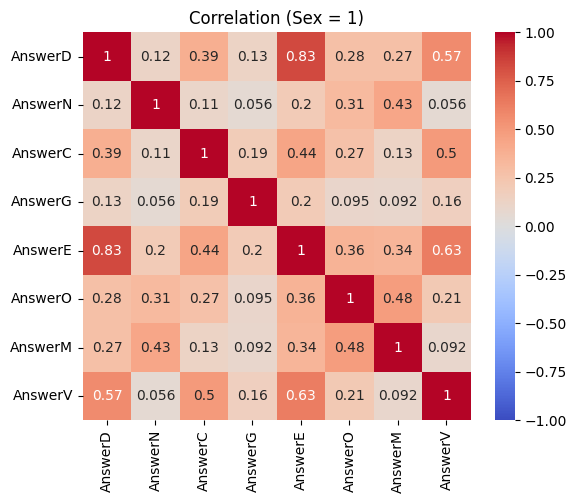


Correlation matrix for Sex = 0:
           AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO   AnswerM  \
AnswerD  1.000000  0.300000  0.497247  0.420801  0.300000  0.163299  0.184219   
AnswerN  0.300000  1.000000  0.259924  0.331540  0.212500  0.244949  0.098250   
AnswerC  0.497247  0.259924  1.000000  0.304063  0.339032  0.064591  0.295626   
AnswerG  0.420801  0.331540  0.304063  1.000000  0.242279  0.364405  0.389946   
AnswerE  0.300000  0.212500  0.339032  0.242279  1.000000  0.163299  0.442126   
AnswerO  0.163299  0.244949  0.064591  0.364405  0.163299  1.000000  0.210580   
AnswerM  0.184219  0.098250  0.295626  0.389946  0.442126  0.210580  1.000000   
AnswerV  0.184219  0.270188  0.295626  0.477645  0.356157  0.130359  0.408748   

          AnswerV  
AnswerD  0.184219  
AnswerN  0.270188  
AnswerC  0.295626  
AnswerG  0.477645  
AnswerE  0.356157  
AnswerO  0.130359  
AnswerM  0.408748  
AnswerV  1.000000  


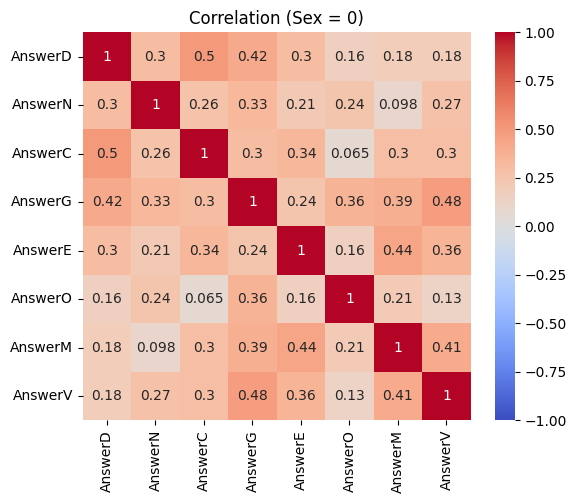


Correlation matrix for Nationality = 0:
           AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO   AnswerM  \
AnswerD  1.000000  0.174964  0.552329  0.145144  0.738680  0.171047  0.272166   
AnswerN  0.174964  1.000000  0.415604  0.299392  0.418251  0.347446  0.428571   
AnswerC  0.552329  0.415604  1.000000  0.198060  0.543671  0.280848  0.238751   
AnswerG  0.145144  0.299392  0.198060  1.000000  0.289404  0.216841  0.112272   
AnswerE  0.738680  0.418251  0.543671  0.289404  1.000000  0.359025  0.418251   
AnswerO  0.171047  0.347446  0.280848  0.216841  0.359025  1.000000  0.449636   
AnswerM  0.272166  0.428571  0.238751  0.112272  0.418251  0.449636  1.000000   
AnswerV  0.371829  0.327178  0.507389  0.284928  0.459250  0.280848  0.238751   

          AnswerV  
AnswerD  0.371829  
AnswerN  0.327178  
AnswerC  0.507389  
AnswerG  0.284928  
AnswerE  0.459250  
AnswerO  0.280848  
AnswerM  0.238751  
AnswerV  1.000000  


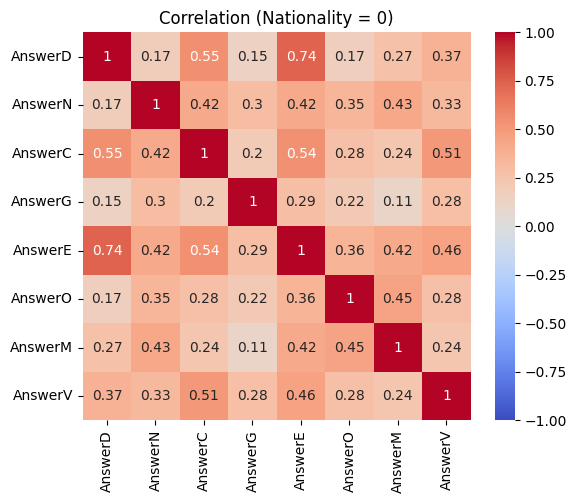


Correlation matrix for Nationality = 1:
           AnswerD   AnswerN   AnswerC   AnswerG   AnswerE   AnswerO   AnswerM  \
AnswerD  1.000000  0.275344  0.344584  0.442760  0.313985  0.245942  0.174964   
AnswerN  0.275344  1.000000 -0.026415  0.093950 -0.072350  0.235407  0.040876   
AnswerC  0.344584 -0.026415  1.000000  0.301287  0.210090  0.053125  0.211014   
AnswerG  0.442760  0.093950  0.301287  1.000000  0.125480  0.287449  0.407945   
AnswerE  0.313985 -0.072350  0.210090  0.125480  1.000000  0.181032  0.389819   
AnswerO  0.245942  0.235407  0.053125  0.287449  0.181032  1.000000  0.206805   
AnswerM  0.174964  0.040876  0.211014  0.407945  0.389819  0.206805  1.000000   
AnswerV  0.356348 -0.046829  0.261892  0.387567  0.458664  0.123613  0.327327   

          AnswerV  
AnswerD  0.356348  
AnswerN -0.046829  
AnswerC  0.261892  
AnswerG  0.387567  
AnswerE  0.458664  
AnswerO  0.123613  
AnswerM  0.327327  
AnswerV  1.000000  


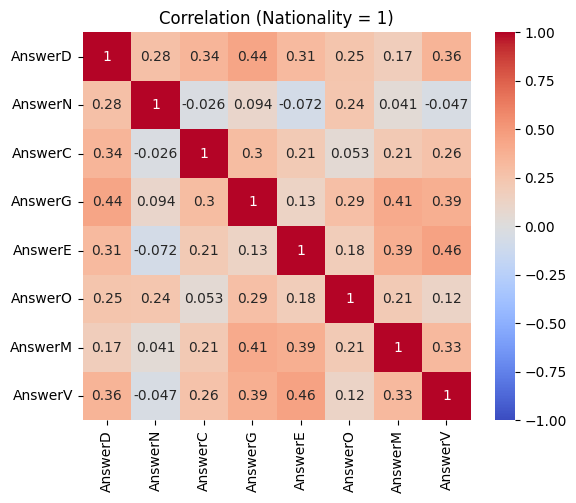


Mean of AnswerSum by Nationality and Sex:
 Nationality  Sex
0            0      5.320000
             1      5.400000
1            0      5.483871
             1      6.000000
Name: AnswerSum, dtype: float64

Correlation of each friend’s correctness with AnswerSum:
 AnswerD    0.670931
AnswerN    0.512626
AnswerC    0.633705
AnswerG    0.570731
AnswerE    0.708304
AnswerO    0.531419
AnswerM    0.599383
AnswerV    0.647113
Name: AnswerSum, dtype: float64


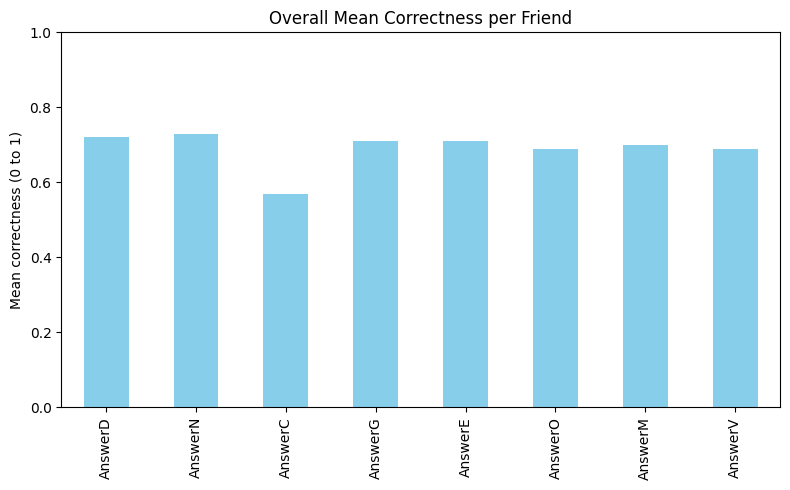

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# ========== 1. IMPORT DATA ==========
# Make sure Data.xlsx is in the same directory or provide the full path
df = pd.read_excel('Data.xlsx')

# Preview the data (optional)
print("Dataframe head:\n", df.head())

# ========== 2. DISTRIBUTION ANALYSIS ==========

# List of friend answer columns (i.e., correctness indicators)
friend_cols = ['AnswerD', 'AnswerN', 'AnswerC', 'AnswerG',
               'AnswerE', 'AnswerO', 'AnswerM', 'AnswerV']

# (A) Distribution of correct answers by Nationality
nationality_dist = df.groupby('Nationality')[friend_cols].mean()
print("\nMean correctness by Nationality:\n", nationality_dist)

# (B) Distribution of correct answers by Sex
sex_dist = df.groupby('Sex')[friend_cols].mean()
print("\nMean correctness by Sex:\n", sex_dist)

# (C) Distribution by Nationality *and* Sex
nat_sex_dist = df.groupby(['Nationality', 'Sex'])[friend_cols].mean()
print("\nMean correctness by Nationality and Sex:\n", nat_sex_dist)

# (D) Visualize mean correctness per friend by Sex
fig, ax = plt.subplots(figsize=(8, 5))
sex_dist.T.plot.bar(ax=ax)  # .T transposes so that each friend is a series
ax.set_title('Mean Correctness by Sex (across all friends)')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# (E) Visualize mean correctness per friend by Nationality
fig, ax = plt.subplots(figsize=(8, 5))
nationality_dist.T.plot.bar(ax=ax)
ax.set_title('Mean Correctness by Nationality (across all friends)')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()

# ========== 3. CORRELATION MATRIX OF FRIENDS’ ANSWERS ==========

# Compute correlation matrix among friends
corr_matrix = df[friend_cols].corr()

# To reorder so that the largest correlations appear in the top-left corner,
# we can use hierarchical clustering on the correlation matrix
distance = 1 - corr_matrix
# Perform hierarchical clustering
link = linkage(distance, method='ward')
# Get the order of the leaves
idx = leaves_list(link)
# Reindex the correlation matrix
reordered_corr = corr_matrix.iloc[idx, idx]

print("\nCorrelation matrix of friends’ answers (reordered):\n", reordered_corr)

# Visualize this reordered correlation matrix with a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    reordered_corr, 
    cmap='coolwarm',  # red for high corr, blue for low corr
    annot=True,       # show numerical correlation values
    vmin=-1, vmax=1,
    square=True,
    ax=ax
)
ax.set_title('Correlation Matrix of Friends’ Answers (Reordered)')
plt.tight_layout()
plt.show()

# ========== 4. CORRELATIONS BY SUBGROUP (SEX, NATIONALITY) ==========

# Subgroup correlation by Sex
unique_sex = df['Sex'].unique()
sex_corr_dict = {}
for s in unique_sex:
    subset = df[df['Sex'] == s]
    # Compute correlation among friend_cols in this subset
    sex_corr = subset[friend_cols].corr()
    sex_corr_dict[s] = sex_corr
    print(f"\nCorrelation matrix for Sex = {s}:\n", sex_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(
        sex_corr,
        cmap='coolwarm', 
        annot=True, 
        vmin=-1, vmax=1, 
        square=True, 
        ax=ax
    )
    ax.set_title(f'Correlation (Sex = {s})')
    plt.tight_layout()
    plt.show()

# Subgroup correlation by Nationality
unique_nationalities = df['Nationality'].unique()
nat_corr_dict = {}
for nat in unique_nationalities:
    subset = df[df['Nationality'] == nat]
    # Compute correlation among friend_cols in this subset
    nat_corr = subset[friend_cols].corr()
    nat_corr_dict[nat] = nat_corr
    print(f"\nCorrelation matrix for Nationality = {nat}:\n", nat_corr)

    # Optionally visualize
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(
        nat_corr, 
        cmap='coolwarm', 
        annot=True, 
        vmin=-1, vmax=1, 
        square=True, 
        ax=ax
    )
    ax.set_title(f'Correlation (Nationality = {nat})')
    plt.tight_layout()
    plt.show()

# ========== 5. ADDITIONAL IDEAS FOR ANALYSIS ==========

# - You could look at the distribution of AnswerSum by Nationality and Sex:
sum_dist = df.groupby(['Nationality','Sex'])['AnswerSum'].mean()
print("\nMean of AnswerSum by Nationality and Sex:\n", sum_dist)

# - You could check the correlation of each friend’s correctness with AnswerSum:
friend_sum_corr = df[friend_cols + ['AnswerSum']].corr()['AnswerSum'].drop('AnswerSum')
print("\nCorrelation of each friend’s correctness with AnswerSum:\n", friend_sum_corr)

# - You could also visually compare how often each friend was correct across all observations:
mean_correctness_per_friend = df[friend_cols].mean()
fig, ax = plt.subplots(figsize=(8, 5))
mean_correctness_per_friend.plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylim([0, 1])
ax.set_title('Overall Mean Correctness per Friend')
ax.set_ylabel('Mean correctness (0 to 1)')
plt.tight_layout()
plt.show()